In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('Flip_Data.csv')

In [4]:
df.head()

,Product Name,Price,Rating,Reviews,Supported Apps,Operating System,Resolution,Sound System
0,XIAOMI X Pro CineMagiQLED 108 cm (43 inch) QLE...,"31,999",3.3,31 Ratings&1 Reviews,Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,2 year comprehensive warranty
1,LG UR7500 108 cm (43 inch) Ultra HD (4K) LED S...,"30,990",4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2023,1 Year Standard Warranty on the Product from t...
2,iFFALCON by TCL U64 126 cm (50 inch) Ultra HD ...,"22,999",4.2,"77,110 Ratings&8,362 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty on Product
3,acerpure by Acer Elevate Tv 108 cm (43 inch) Q...,"19,999",4.2,"1,108 Ratings&187 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty
4,LG UR75 126 cm (50 inch) Ultra HD (4K) LED Sma...,"38,990",4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,1 Year Warranty from the date of purchase (T&C...


In [3]:
print(df.head())

                                        Product Name   Price  Rating  \
0  XIAOMI X Pro CineMagiQLED 108 cm (43 inch) QLE...  31,999     3.3   
1  LG UR7500 108 cm (43 inch) Ultra HD (4K) LED S...  30,990     4.4   
2  iFFALCON by TCL U64 126 cm (50 inch) Ultra HD ...  22,999     4.2   
3  acerpure by Acer Elevate Tv 108 cm (43 inch) Q...  19,999     4.2   
4  LG UR75 126 cm (50 inch) Ultra HD (4K) LED Sma...  38,990     4.4   

                        Reviews               Supported Apps  \
0          31 Ratings&1 Reviews  Operating System: Google TV   
1  20,210 Ratings&1,530 Reviews      Operating System: WebOS   
2  77,110 Ratings&8,362 Reviews  Operating System: Google TV   
3     1,108 Ratings&187 Reviews  Operating System: Google TV   
4  20,210 Ratings&1,530 Reviews      Operating System: WebOS   

                   Operating System         Resolution  \
0  Ultra HD (4K) 3840 x 2160 Pixels  Launch Year: 2025   
1  Ultra HD (4K) 3840 x 2160 Pixels  Launch Year: 2023   
2  Ultra

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      555 non-null    object 
 1   Price             555 non-null    object 
 2   Rating            555 non-null    float64
 3   Reviews           555 non-null    object 
 4   Supported Apps    555 non-null    object 
 5   Operating System  555 non-null    object 
 6   Resolution        555 non-null    object 
 7   Sound System      548 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.8+ KB
None


In [6]:
print(df.describe())

           Rating
count  555.000000
mean     4.138559
std      0.368906
min      2.700000
25%      4.000000
50%      4.300000
75%      4.400000
max      5.000000


### Handle Missing Values

In [7]:
print(df.isnull().sum())

Product Name        0
Price               0
Rating              0
Reviews             0
Supported Apps      0
Operating System    0
Resolution          0
Sound System        7
dtype: int64


In [8]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 258


In [9]:
# Remove duplicates
df = df.drop_duplicates()

# Price Standardization

In [11]:
# Convert Price to numeric (remove commas and convert to float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Create price categories if needed
df['Price_Category'] = pd.cut(df['Price'],
                             bins=[0, 10000, 20000, 30000, 50000, 100000, float('inf')],
                             labels=['<10k', '10k-20k', '20k-30k', '30k-50k', '50k-100k', '>100k'])

In [12]:
# Ensure Rating is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Handle any missing ratings (if they exist)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

<ipython-input-12-8d335e3341fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [13]:
# Extract screen size in cm from Product Name
df['Screen_Size_cm'] = df['Product Name'].str.extract(r'(\d+\.?\d*)\s?cm').astype(float)

# Convert to inches (1 inch = 2.54 cm)
df['Screen_Size_inches'] = df['Screen_Size_cm'] / 2.54

# Create size categories
df['Size_Category'] = pd.cut(df['Screen_Size_inches'],
                            bins=[0, 32, 43, 50, 55, 65, 75, float('inf')],
                            labels=['Small (<32")', 'Medium (32-43")', 'Large (43-50")',
                                    'X-Large (50-55")', 'XX-Large (55-65")',
                                    'Giant (65-75")', 'Massive (>75")'])

In [14]:
# Standardize operating system names
df['Operating System'] = df['Operating System'].str.strip()
df['Operating System'] = df['Operating System'].replace({
    'FireTv OS 7': 'Fire OS',
    'Coolita': 'Coolita OS',
    'VIDAA': 'Vidaa OS',
    'Dor OS': 'DorOS',
    'Android Based': 'Android',
    'Linux based': 'Linux'
})

# Extract main OS categories
df['OS_Type'] = df['Operating System'].apply(lambda x: 'Other' if x not in ['Android', 'Google TV', 'WebOS', 'Tizen'] else x)

In [15]:
# Standardize resolution values
df['Resolution'] = df['Resolution'].str.replace('Pixels', '').str.strip()
df['Resolution_Type'] = df['Resolution'].str.extract(r'(HD Ready|Full HD|Ultra HD \(4K\))')[0]

### Exploratory Data Analysis (EDA)

In [17]:
print(df[['Price', 'Rating', 'Screen_Size_cm']].describe())

               Price      Rating  Screen_Size_cm
count     297.000000  297.000000      294.000000
mean    36536.892256    4.187205      117.447211
std     34185.234941    0.325760       31.738985
min      5799.000000    2.700000       60.000000
25%     15499.000000    4.100000       81.070000
50%     26999.000000    4.200000      109.000000
75%     42999.000000    4.300000      139.000000
max    251099.000000    5.000000      215.000000


# Price Distribution

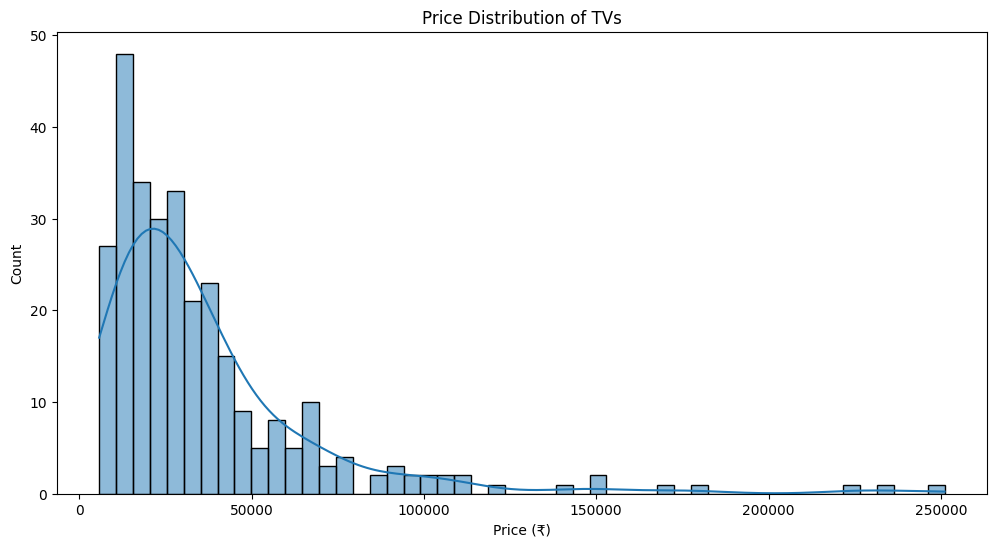

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution of TVs')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()

# Rating Distribution

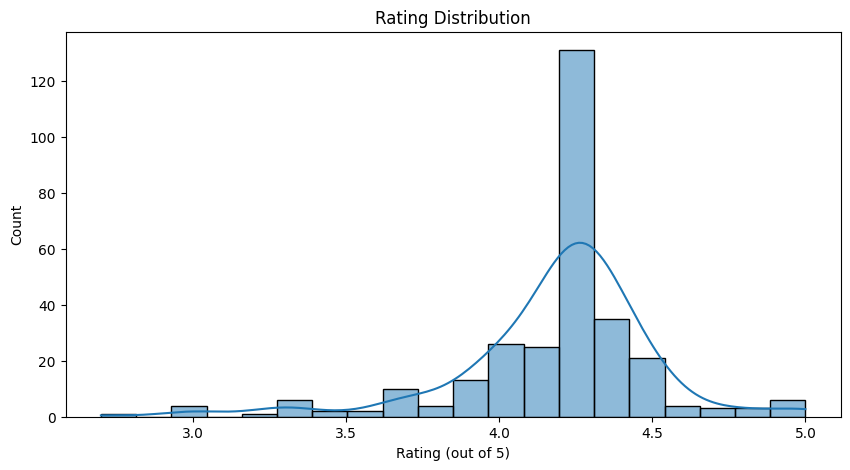

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating (out of 5)')
plt.show()

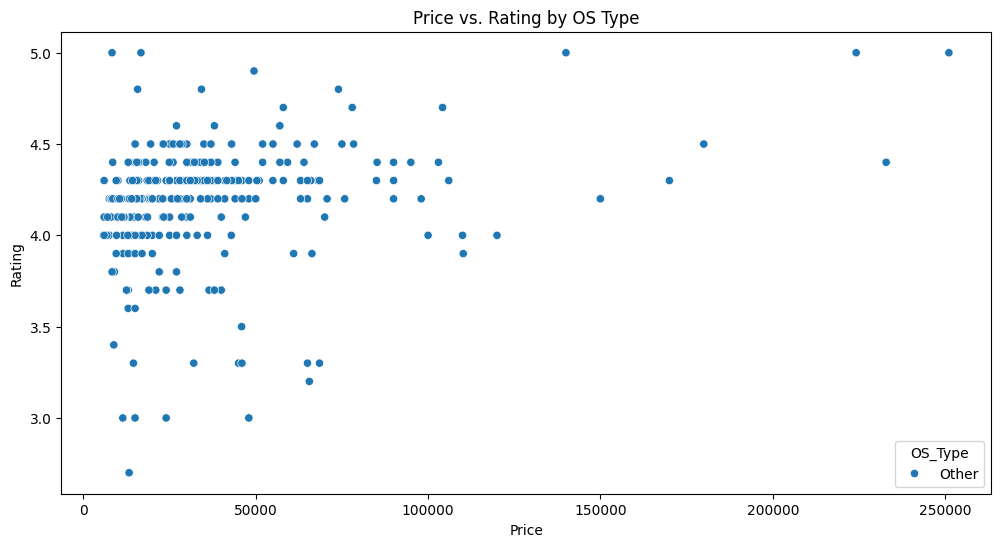

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', data=df, hue='OS_Type')
plt.title('Price vs. Rating by OS Type')
plt.show()

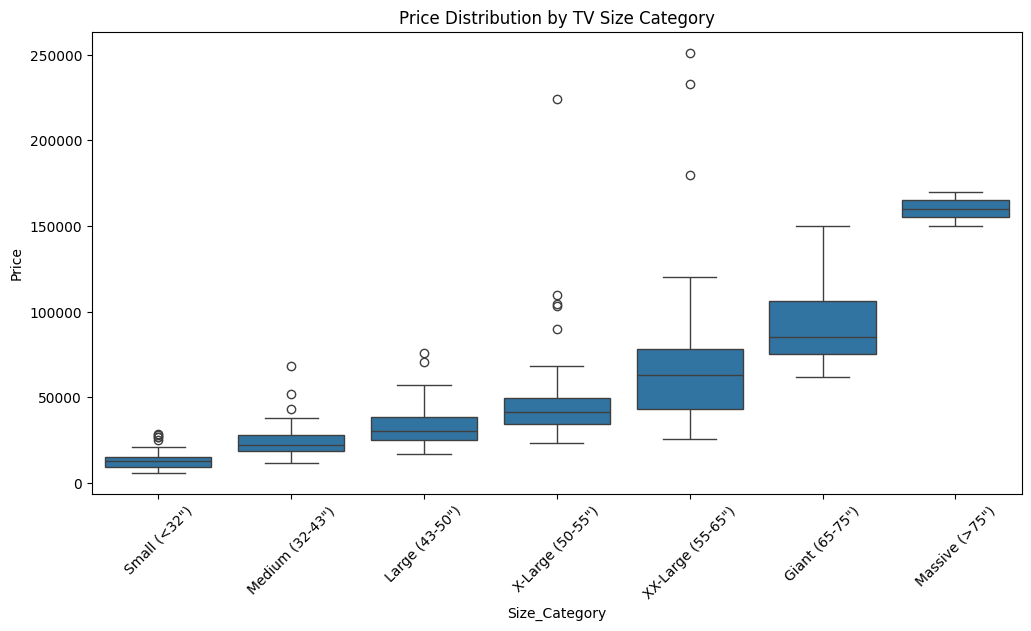

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Size_Category', y='Price', data=df)
plt.title('Price Distribution by TV Size Category')
plt.xticks(rotation=45)
plt.show()

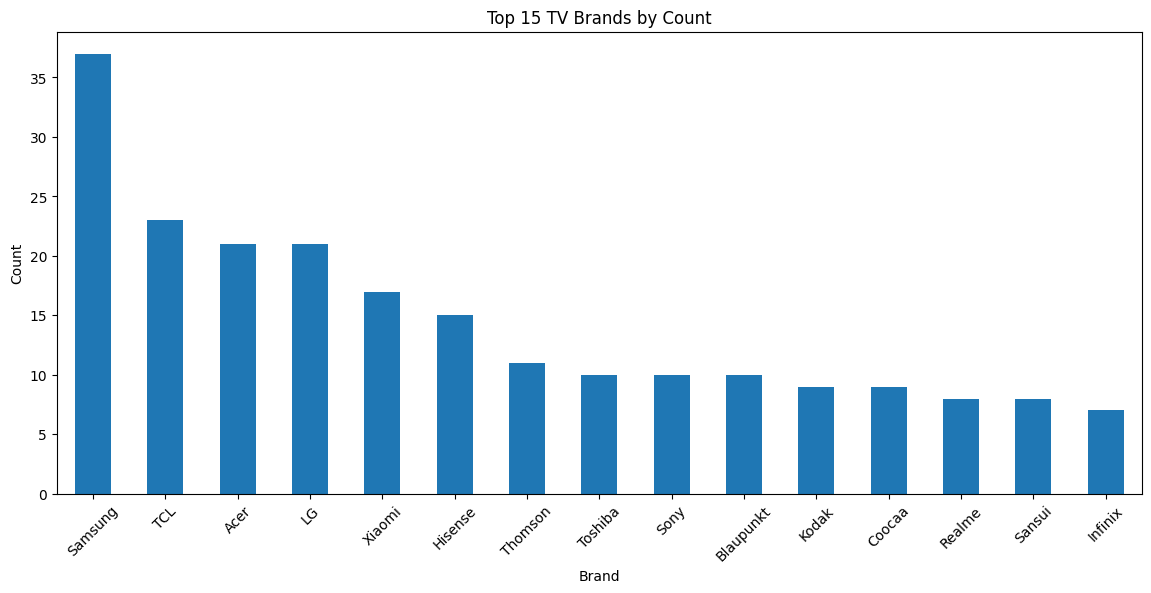

In [24]:
# Extract brand names from Product Name
df['Brand'] = df['Product Name'].str.split().str[0]
df['Brand'] = df['Brand'].replace({
    'Mi': 'Xiaomi',
    'REDMI': 'Xiaomi',
    'realme': 'Realme',
    'iFFALCON': 'TCL',
    'Blaupunkt': 'Blaupunkt',
    'Thomson': 'Thomson',
    'LG': 'LG',
    'SAMSUNG': 'Samsung',
    'SONY': 'Sony',
    'TOSHIBA': 'Toshiba',
    'Hisense': 'Hisense',
    'Panasonic': 'Panasonic',
    'Acer': 'Acer',
    'acerpure': 'Acer',
    'TCL': 'TCL',
    'InnoQ': 'InnoQ',
    'Coocaa': 'Coocaa',
    'KODAK': 'Kodak',
    'MOTOROLA': 'Motorola',
    'ONIDA': 'Onida',
    'Haier': 'Haier',
    'Vu': 'Vu',
    'MarQ': 'MarQ',
    'Compaq': 'Compaq',
    'Daiwa': 'Daiwa',
    'Foxsky': 'Foxsky',
    'Sansui': 'Sansui',
    'Infinix': 'Infinix',
    'BPL': 'BPL',
    'Hyundai': 'Hyundai',
    'Lloyd': 'Lloyd',
    'NU': 'NU',
    'CANDY': 'Candy',
    'IMPEX': 'Impex',
    'LEEMA': 'Leema',
    'IAIR': 'IAir',
    'Nacson': 'Nacson',
    'Aiwa': 'Aiwa',
    'Micromax': 'Micromax',
    'Samtonic': 'Samtonic',
    'REALMERCURY': 'Realmercury',
    'HUIDI': 'Huidi',
    'OnePlus': 'OnePlus',
    'Reliance': 'Reliance',
    'XIAOMI': 'Xiaomi'
})

plt.figure(figsize=(14, 6))
top_brands = df['Brand'].value_counts().head(15)
top_brands.plot(kind='bar')
plt.title('Top 15 TV Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

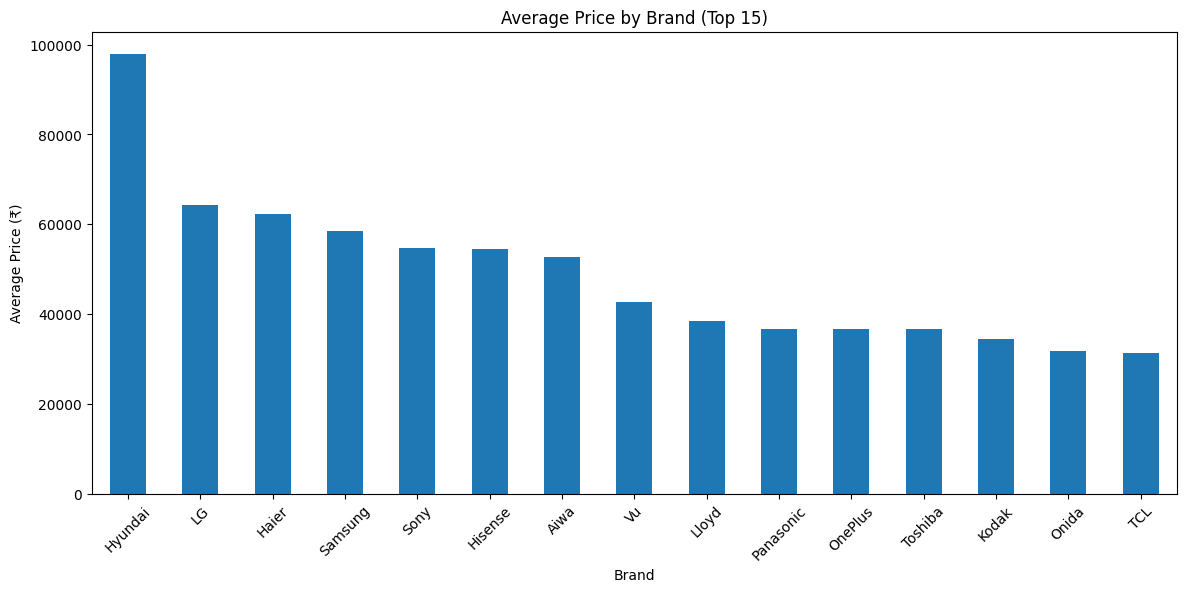

In [25]:
plt.figure(figsize=(14, 6))
df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Average Price by Brand (Top 15)')
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()

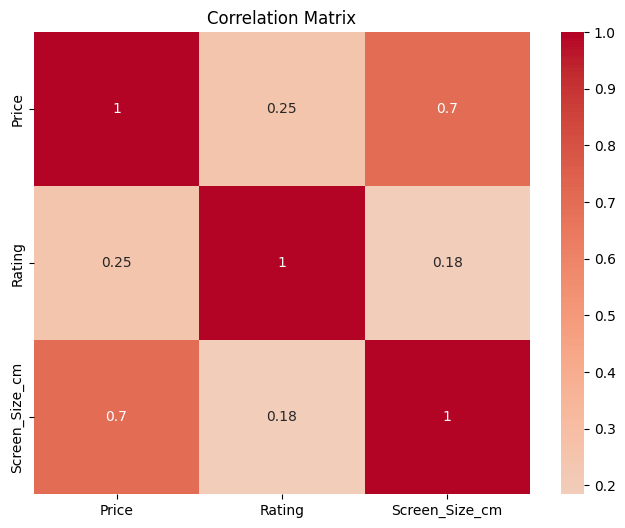

In [26]:
# Select numerical columns for correlation
numerical_cols = ['Price', 'Rating', 'Screen_Size_cm']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Flip_Data.csv', index=False)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [30]:
# Load the cleaned data
df = pd.read_csv('/content/Cleaned_Flip_Data.csv')
df.head()


,Product Name,Price,Rating,Reviews,Supported Apps,Operating System,Resolution,Sound System,Price_Category,Screen_Size_cm,Screen_Size_inches,Size_Category,OS_Type,Resolution_Type,Brand
0,XIAOMI X Pro CineMagiQLED 108 cm (43 inch) QLE...,31999.0,3.3,31 Ratings&1 Reviews,Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,2 year comprehensive warranty,30k-50k,108.0,42.519685,"Medium (32-43"")",Other,NaN,Xiaomi
1,LG UR7500 108 cm (43 inch) Ultra HD (4K) LED S...,30990.0,4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2023,1 Year Standard Warranty on the Product from t...,30k-50k,108.0,42.519685,"Medium (32-43"")",Other,NaN,LG
2,iFFALCON by TCL U64 126 cm (50 inch) Ultra HD ...,22999.0,4.2,"77,110 Ratings&8,362 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty on Product,20k-30k,126.0,49.606299,"Large (43-50"")",Other,NaN,TCL
3,acerpure by Acer Elevate Tv 108 cm (43 inch) Q...,19999.0,4.2,"1,108 Ratings&187 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty,10k-20k,108.0,42.519685,"Medium (32-43"")",Other,NaN,Acer
4,LG UR75 126 cm (50 inch) Ultra HD (4K) LED Sma...,38990.0,4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,1 Year Warranty from the date of purchase (T&C...,30k-50k,126.0,49.606299,"Large (43-50"")",Other,NaN,LG


In [58]:
df.isnull().sum()


,0
Product Name,0
Price,0
Rating,0
Reviews,0
Supported Apps,0
Operating System,0
Resolution,0
Sound System,7
Price_Category,0
Screen_Size_cm,3


In [60]:
df.drop(columns=['Resolution_Type'],inplace=True)

In [62]:
df['Screen_Size_cm'].fillna("75",inplace=True)

In [63]:
df['Screen_Size_inches'].fillna("32",inplace=True)

In [66]:
df['Size_Category'].fillna("Medium32-43",inplace=True)

In [68]:
df['Sound System'].fillna("soundmedia",inplace=True)

In [69]:
from sklearn.impute import SimpleImputer

# For all numeric columns
num_imputer = SimpleImputer(strategy='mean')  # or use 'median'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])


In [70]:
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [71]:
df.isnull().sum().sum()  # Should return 0 if all missing values are handled


np.int64(0)

In [40]:
print(df.dtypes)


Product Name           object
Price                 float64
Rating                float64
Reviews                object
Supported Apps         object
Operating System       object
Resolution             object
Sound System           object
Price_Category         object
Screen_Size_cm        float64
Screen_Size_inches    float64
Size_Category          object
OS_Type                object
Resolution_Type       float64
Brand                  object
dtype: object


In [74]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Preview the columns
print(numeric_df.columns)


Index(['Price', 'Rating', 'label'], dtype='object')


In [75]:
# Drop columns where more than 50% of values are missing
numeric_df = numeric_df.loc[:, numeric_df.isnull().mean() < 0.5]

# Then fill missing values
clustering_data = numeric_df.fillna(numeric_df.mean())
scaled_data = scaler.fit_transform(clustering_data)



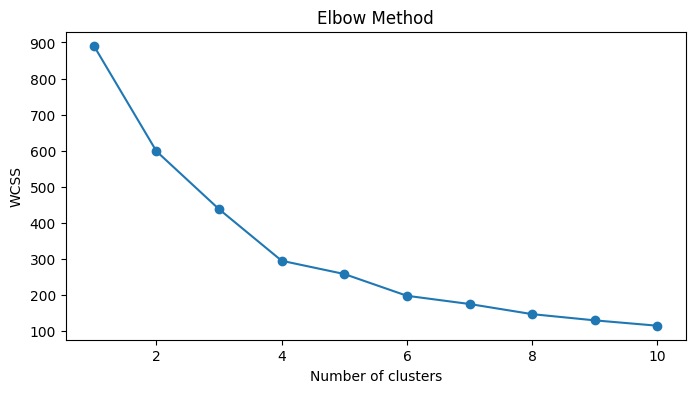

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [77]:
# Choose n_clusters based on elbow curve (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


In [78]:
# Proceed with K-Means clustering using 4 clusters (based on elbow curve)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
df_with_clusters = df.copy()
df_with_clusters['cluster'] = clusters

# Display first few rows of the updated dataset
df_with_clusters.head()


,Product Name,Price,Rating,Reviews,Supported Apps,Operating System,Resolution,Sound System,Price_Category,Screen_Size_cm,Screen_Size_inches,Size_Category,OS_Type,Brand,label,cluster
0,XIAOMI X Pro CineMagiQLED 108 cm (43 inch) QLE...,31999.0,3.3,31 Ratings&1 Reviews,Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,2 year comprehensive warranty,30k-50k,108.0,42.519685,"Medium (32-43"")",Other,Xiaomi,2.0,2
1,LG UR7500 108 cm (43 inch) Ultra HD (4K) LED S...,30990.0,4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2023,1 Year Standard Warranty on the Product from t...,30k-50k,108.0,42.519685,"Medium (32-43"")",Other,LG,2.0,3
2,iFFALCON by TCL U64 126 cm (50 inch) Ultra HD ...,22999.0,4.2,"77,110 Ratings&8,362 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty on Product,20k-30k,126.0,49.606299,"Large (43-50"")",Other,TCL,1.0,0
3,acerpure by Acer Elevate Tv 108 cm (43 inch) Q...,19999.0,4.2,"1,108 Ratings&187 Reviews",Operating System: Google TV,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2024,1 Year Warranty,10k-20k,108.0,42.519685,"Medium (32-43"")",Other,Acer,0.0,0
4,LG UR75 126 cm (50 inch) Ultra HD (4K) LED Sma...,38990.0,4.4,"20,210 Ratings&1,530 Reviews",Operating System: WebOS,Ultra HD (4K) 3840 x 2160 Pixels,Launch Year: 2025,1 Year Warranty from the date of purchase (T&C...,30k-50k,126.0,49.606299,"Large (43-50"")",Other,LG,2.0,3


### Supervised Learning

In [79]:
target = 'Price_Category'


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [80]:
# Encode the target variable
le = LabelEncoder()
df['label'] = le.fit_transform(df[target])

In [81]:
# Drop non-numeric or irrelevant columns
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['label'], errors='ignore')
y = df['label']

In [82]:
# Handle missing values
X = X.fillna(X.mean())

In [83]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': acc, 'F1 Score': f1}


In [86]:
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
results_df

,Accuracy,F1 Score
XGBoost,0.966667,0.963194
Random Forest,0.883333,0.869227
Logistic Regression,0.833333,0.796764
SVM,0.800000,0.763404
k-NN,0.783333,0.763056


In [87]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9578059071729957
